In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization
import random
import matplotlib.dates as mdates #dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

In [2]:
temperature_data_a = pd.read_csv('temperature_2017.csv', sep = ',');
flow_data_a = pd.read_csv('flow_2017.csv', sep = ',');
humidity_data_a = pd.read_csv('humidity_2017.csv', sep = ',');
weight_data_a = pd.read_csv('weight_2017.csv', sep = ',');

In [3]:
print(temperature_data_a.head(5))
print(flow_data_a.head(5)) 
print(humidity_data_a.head(5))
print(weight_data_a.head(5))

             timestamp  temperature
0  2017-01-01 05:00:00    -1.911244
1  2017-01-01 06:00:00    -1.866717
2  2017-01-01 07:00:00    -2.077833
3  2017-01-01 08:00:00    -2.327167
4  2017-01-01 09:00:00    -2.791233
             timestamp  flow
0  2017-01-01 05:15:00     0
1  2017-01-01 05:16:00     0
2  2017-01-01 05:17:00     0
3  2017-01-01 05:18:00     0
4  2017-01-01 05:19:00     0
             timestamp   humidity
0  2017-01-01 05:00:00  92.406667
1  2017-01-01 06:00:00  92.270000
2  2017-01-01 07:00:00  92.575000
3  2017-01-01 08:00:00  92.840000
4  2017-01-01 09:00:00  93.640000
             timestamp   weight
0  2017-01-01 05:15:00  52.6974
1  2017-01-01 05:16:00  52.6974
2  2017-01-01 05:17:00  52.6974
3  2017-01-01 05:18:00  52.6974
4  2017-01-01 05:19:00  52.6973


# Temperature

In [4]:
temperature_time_arr_a = pd.to_datetime(temperature_data_a.timestamp)
ts_temperature_a = pd.Series(data=np.array(temperature_data_a.temperature), 
                           index=pd.DatetimeIndex(temperature_time_arr_a), dtype="float")


In [5]:
ts_temperature_hour_a = ts_temperature_a.resample("H").mean()

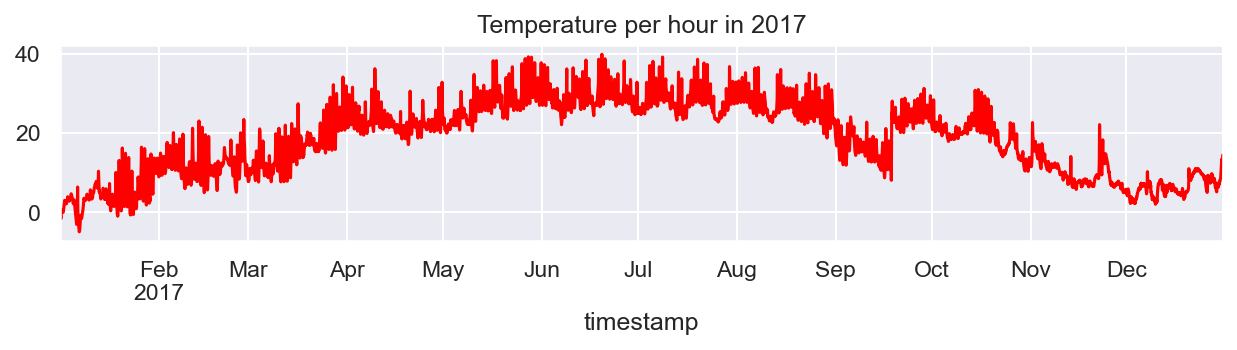

In [6]:
plt.figure(1, figsize=(10,5), dpi=150)
plt.subplots_adjust(hspace = 0.9)
plt.subplot(211)
ts_temperature_hour_a.plot(title="Temperature per hour in 2017", color="red")


# Flow

In [7]:
flow_time_arr_a = pd.to_datetime(flow_data_a.timestamp)
ts_flow_a = pd.Series(data=np.array(flow_data_a.flow), 
                           index=pd.DatetimeIndex(flow_time_arr_a), dtype="float")


In [8]:
ts_flow_hour_a = ts_flow_a.resample("H").sum()

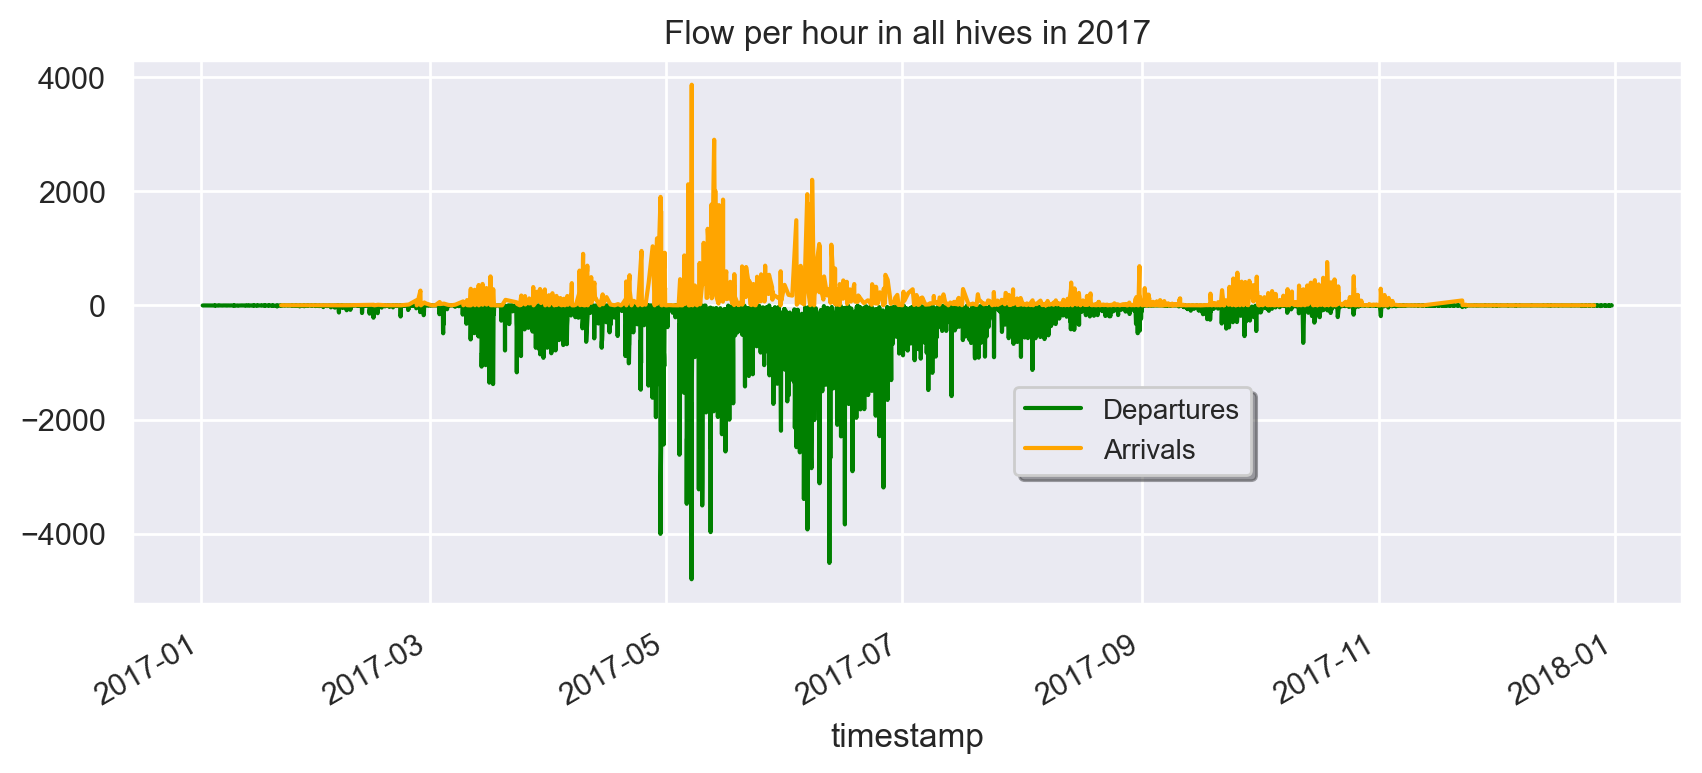

In [9]:
ax = plt.figure(figsize=(10,4), dpi=200)
ts_flow_hour_a[ts_flow_hour_a < 0].plot(title="Flow per hour in all hives in 2017", color="green", label = "Departures")
ts_flow_hour_a[ts_flow_hour_a > 0].plot(color="orange", label = "Arrivals")
leg = ax.legend(loc='upper left', bbox_to_anchor=(0.5, 0.5),shadow=True, fontsize='small');

# Humidity

In [10]:
humidity_time_arr_a = pd.to_datetime(humidity_data_a.timestamp)
ts_humidity_a = pd.Series(data=np.array(humidity_data_a.humidity), 
                           index=pd.DatetimeIndex(humidity_time_arr_a), dtype="float")


In [11]:
ts_humidity_day_a = ts_humidity_a.resample("D").mean()

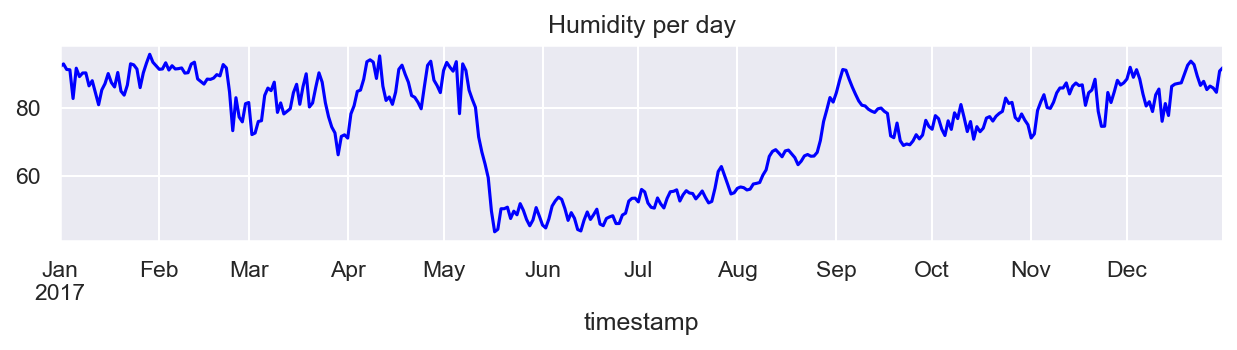

In [12]:
plt.figure(1, figsize=(10,5), dpi=150)
plt.subplots_adjust(hspace = 0.9)
plt.subplot(211)
ts_humidity_day_a.plot(title="Humidity per day", color="blue")


# Weight

In [13]:
weight_time_arr_a = pd.to_datetime(weight_data_a.timestamp)
ts_weight_a = pd.Series(data=np.array(weight_data_a.weight), 
                           index=pd.DatetimeIndex(weight_time_arr_a), dtype="float")


In [14]:
ts_weight_day_a = ts_weight_a.resample("D").mean()

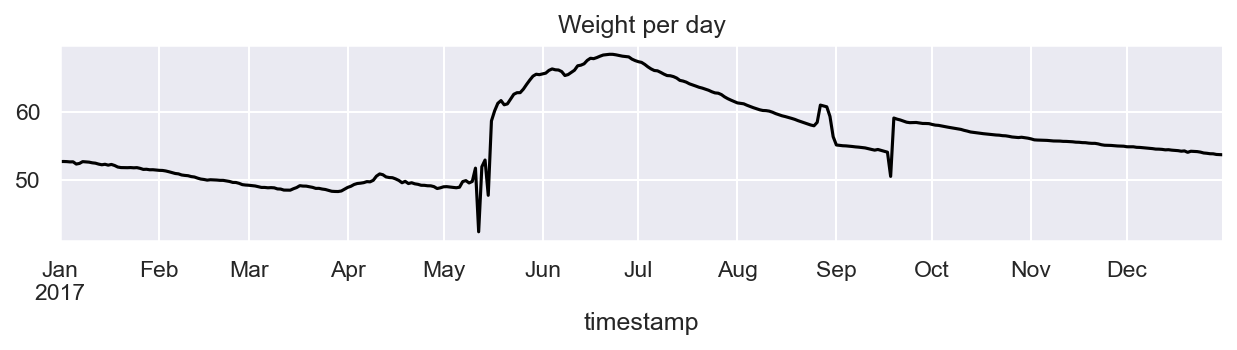

In [15]:
plt.figure(1, figsize=(10,5), dpi=150)
plt.subplots_adjust(hspace = 0.9)
plt.subplot(211)
ts_weight_day_a.plot(title="Weight per day", color="black")


# All Parameters in 2017

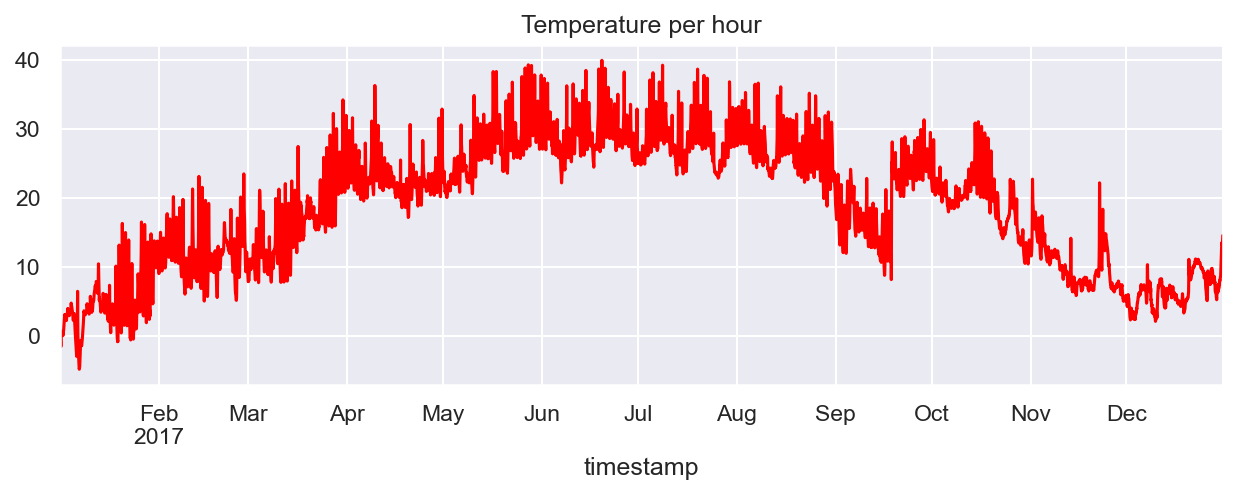

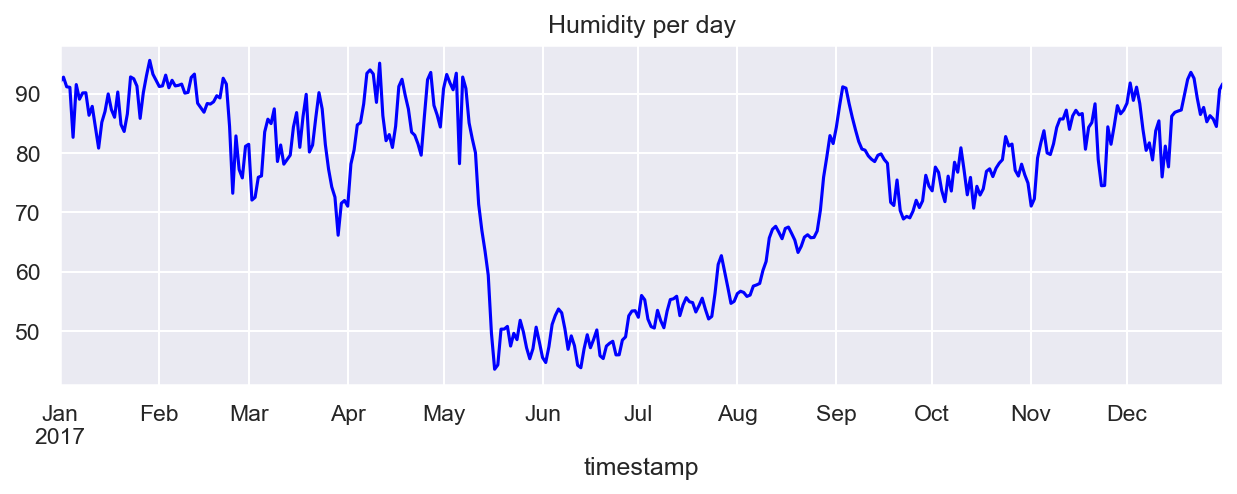

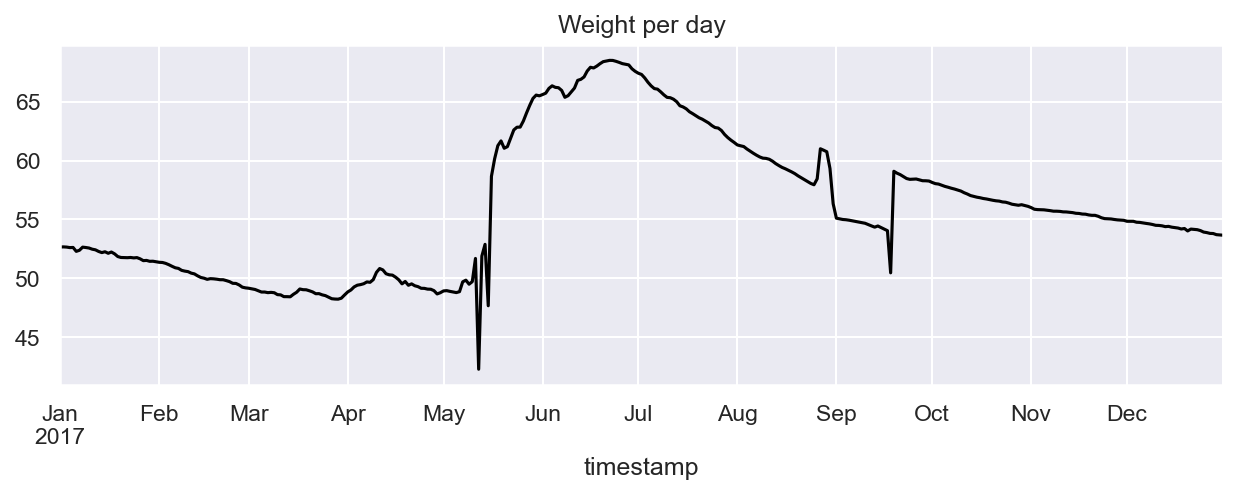

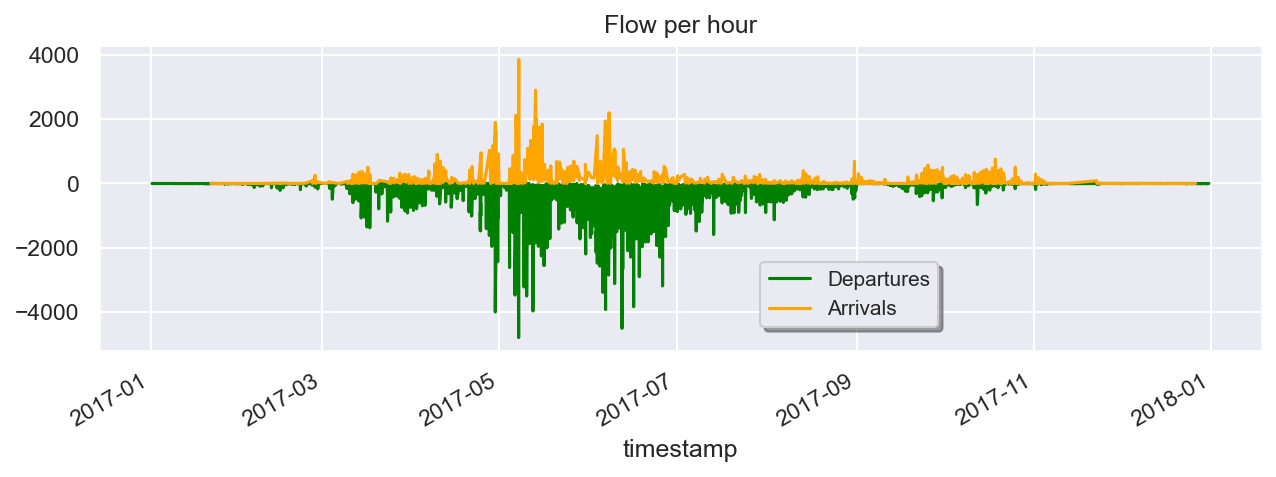

In [16]:
plt.figure(1, figsize=(10,3), dpi=150)
plt.subplots_adjust(hspace = 0.9)
ts_temperature_hour_a.plot(title="Temperature per hour", color="red")
plt.show()

plt.figure(1, figsize=(10,3), dpi=150)
plt.subplots_adjust(hspace = 0.9)
ts_humidity_day_a.plot(title="Humidity per day", color="blue")
plt.show()

plt.figure(1, figsize=(10,3), dpi=150)
plt.subplots_adjust(hspace = 0.9)
ts_weight_day_a.plot(title="Weight per day", color="black")
plt.show()

ax = plt.figure(figsize=(10,3), dpi=150)
ts_flow_hour_a[ts_flow_hour_a < 0].plot(title="Flow per hour", color="green", label = "Departures")
ts_flow_hour_a[ts_flow_hour_a > 0].plot(color="orange", label = "Arrivals")
leg = ax.legend(loc='upper left', bbox_to_anchor=(0.5, 0.5),shadow=True, fontsize='small');
